In [ ]:
!pip -qq install wget

  Preparing metadata (setup.py) ... done


In [ ]:
import wget

url = "https://chitkara-hackathon.s3.ap-south-1.amazonaws.com/Chitkara_Anomaly_Detection.zip"
wget.download(url)

'Chitkara_Anomaly_Detection.zip'

In [ ]:
!unzip '/content/Chitkara_Anomaly_Detection.zip'

Archive:  /content/Chitkara_Anomaly_Detection.zip
  inflating: Chitkara_Anomaly_Detection/.DS_Store  
  inflating: Chitkara_Anomaly_Detection/Login_Data.csv  


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Chitkara_Anomaly_Detection/Login_Data.csv")
df.columns = ['Timestamp', 'UserID', 'IP', 'Country', 'Region', 'City', 'Browser_Name_Version', 'Device', 'Successful']
print('Entries: ', len(df))
print('Features: ', len(df.columns))

Entries:  31269264
Features:  9


In [ ]:
df[['Browser', 'Version']] = df['Browser_Name_Version'].str.extract(r'([a-zA-Z]+[a-zA-Z\s]*[a-zA-Z]+) (\d.*\d)')
df.drop(['Browser_Name_Version'], inplace=True, axis=1)

In [ ]:
df.isnull().sum()

Timestamp         0
UserID            0
IP                0
Country           0
Region        47409
City           8590
Device         1526
Successful        0
Browser       60307
Version       60307
dtype: int64

In [ ]:
df

,Timestamp,UserID,IP,Country,Region,City,Device,Successful,Browser,Version
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,mobile,False,Firefox,20.0.0.1618
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,mobile,False,Chrome Mobile,46.0.2490
2,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,mobile,True,Android,2.3.3.2672
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,mobile,False,Chrome Mobile WebView,85.0.4183
4,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,mobile,False,Chrome Mobile WebView,85.0.4183
...,...,...,...,...,...,...,...,...,...,...
31269259,2021-02-28 23:59:47.766,-4324475583306591935,170.39.78.106,US,-,-,unknown,False,AwarioSmartBot,1.0
31269260,2021-02-28 23:59:49.956,-4324475583306591935,170.39.79.123,US,-,-,mobile,False,Chrome Mobile WebView,80.0.3987
31269261,2021-02-28 23:59:54.233,-4324475583306591935,170.39.78.106,US,-,-,unknown,False,AwarioSmartBot,1.0
31269262,2021-02-28 23:59:56.343,-4324475583306591935,10.3.205.188,RU,St.-Petersburg,St Petersburg,bot,False,ZipppBot,0.11


In [ ]:
df['Region'] = df['Region'].fillna('reg_null')
df['City'] = df['City'].fillna('city_null')
df['Device'] = df['Device'].fillna('dev_null')
df['Browser'] = df['Browser'].fillna('browse_null')
df['Version'] = df['Version'].fillna('ver_null')

df['Region'] = df['Region'].replace('-', 'reg_null')
df['City'] = df['City'].replace('-', 'city_null')

'''
Region                  47409
City                     8590
Device                   1526
'''

'\nRegion                  47409\nCity                     8590\nDevice                   1526\n'

In [ ]:
df.isnull().sum()

Timestamp     0
UserID        0
IP            0
Country       0
Region        0
City          0
Device        0
Successful    0
Browser       0
Version       0
dtype: int64

In [ ]:
def get_dates(df):
    new = df.copy()
    del df
    new['Timestamp'] = pd.to_datetime(new['Timestamp'])
    new['Year'] = new['Timestamp'].dt.year
    new['Month'] = new['Timestamp'].dt.month
    new['Day'] = new['Timestamp'].dt.day
    new['Hour'] = new['Timestamp'].dt.hour
    new['Minute'] = new['Timestamp'].dt.minute
    new['Second'] = new['Timestamp'].dt.second
    new.drop('Timestamp', inplace=True, axis=1)
    return new

df = get_dates(df)
df

,UserID,IP,Country,Region,City,Device,Successful,Browser,Version,Year,Month,Day,Hour,Minute,Second
0,-4324475583306591935,10.0.65.171,NO,reg_null,city_null,mobile,False,Firefox,20.0.0.1618,2020,2,3,12,43,30
1,-4324475583306591935,194.87.207.6,AU,reg_null,city_null,mobile,False,Chrome Mobile,46.0.2490,2020,2,3,12,43,43
2,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,mobile,True,Android,2.3.3.2672,2020,2,3,12,43,55
3,-4324475583306591935,170.39.78.152,US,reg_null,city_null,mobile,False,Chrome Mobile WebView,85.0.4183,2020,2,3,12,43,56
4,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,mobile,False,Chrome Mobile WebView,85.0.4183,2020,2,3,12,43,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31269259,-4324475583306591935,170.39.78.106,US,reg_null,city_null,unknown,False,AwarioSmartBot,1.0,2021,2,28,23,59,47
31269260,-4324475583306591935,170.39.79.123,US,reg_null,city_null,mobile,False,Chrome Mobile WebView,80.0.3987,2021,2,28,23,59,49
31269261,-4324475583306591935,170.39.78.106,US,reg_null,city_null,unknown,False,AwarioSmartBot,1.0,2021,2,28,23,59,54
31269262,-4324475583306591935,10.3.205.188,RU,St.-Petersburg,St Petersburg,bot,False,ZipppBot,0.11,2021,2,28,23,59,56


In [ ]:
import gc
gc.collect()

74

In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import category_encoders as ce

test = df.sample(100000)
columns_to_encode = ['IP', 'Country', 'Region', 'City', 'Device', 'Browser', 'Version']
# Initialize an empty dataframe for the encoded columns
encoded_df = pd.DataFrame()

for column in columns_to_encode:
    freq_encoder = ce.CountEncoder()
    encoded_column = freq_encoder.fit_transform(test[column])
    encoded_column.rename(columns={column: f'{column}_count'}, inplace=True)
    encoded_df = pd.concat([encoded_df, encoded_column], axis=1)

test.drop(columns=columns_to_encode, inplace=True)
test_encoded = pd.concat([test, encoded_df], axis=1)
test_encoded['Successful'] = test_encoded['Successful'].astype(int)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_encoded.values)
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

test_encoded['TSNE Component 1'] = tsne_features[:, 0]
test_encoded['TSNE Component 2'] = tsne_features[:, 1]
test_encoded['KMeans Cluster'] = kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                       UserID  Successful  Year  Month  Day  Hour  Minute  \
14460404 -8567543105715458888           1  2020      8   23     9      35   
20391969 -4324475583306591935           0  2020     11   10    14      36   
3505572  -4324475583306591935           0  2020      3   22    10      25   
9186215   4104626264828793317           0  2020      6   10     4      57   
17127504 -4324475583306591935           0  2020      9   28    18       6   

          Second  IP_count  Country_count  Region_count  City_count  \
14460404       5         2          42310         44956       44466   
20391969       8       213            317           214         213   
3505572       12         1          42310          6451         654   
9186215       27        13          27768         44956       44466   
17127504      59         1          42310         44956       44466   

          Device_count  Browser_count  Version_count  TSNE Component 1  \
14460404         25259          2544

In [ ]:
original_variance = np.var(scaled_data, axis=0).sum()
selected_features_variance = np.var(tsne_features, axis=0).sum()
variance_lost = original_variance - selected_features_variance
percentage_variance_lost = (variance_lost / original_variance) * 100
print(f"Variance Lost: {variance_lost:.4f}")
print(f"Percentage Variance Lost: {percentage_variance_lost:.2f}%")

Variance Lost: -6183.9863
Percentage Variance Lost: -41226.58%


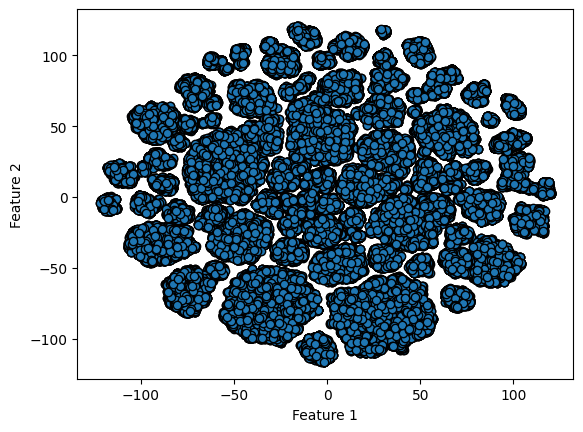

In [ ]:
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Combine all the algorithms
lof = LocalOutlierFactor()
kmeans = KMeans(n_clusters=5)
dbscan = DBSCAN()
agglomerative = AgglomerativeClustering(n_clusters=5, linkage='ward')
gmm = GaussianMixture(n_components=5)
spectral = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='kmeans')
bandwidth = estimate_bandwidth(pca_features, quantile=0.2, n_samples=500)
mean_shift = MeanShift(bandwidth=bandwidth)

# Fit and predict using the algorithms
lof_labels = lof.fit_predict(pca_features)
kmeans_labels = kmeans.fit_predict(pca_features)
dbscan_labels = dbscan.fit_predict(pca_features)
agglomerative_labels = agglomerative.fit_predict(pca_features)
gmm_labels = gmm.fit_predict(pca_features)
spectral_labels = spectral.fit_predict(pca_features)
mean_shift_labels = mean_shift.fit_predict(pca_features)

# Create a combined plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=lof_labels, cmap='rainbow', label='LOF')
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='cool', label='K-Means')
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan_labels, cmap='autumn', label='DBSCAN')
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=agglomerative_labels, cmap='spring', label='Agglomerative')
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=gmm_labels, cmap='summer', label='GMM')
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=spectral_labels, cmap='winter', label='Spectral')
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=mean_shift_labels, cmap='seismic', label='Mean Shift')

plt.title('Algorithm Ensembles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(scaled_data)
isolation_scores = isolation_forest.decision_function(scaled_data)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_scores = lof.fit_predict(scaled_data)

svm = OneClassSVM(nu=0.05)
svm.fit(scaled_data)
svm_scores = svm.decision_function(scaled_data)
combined_scores = np.column_stack((isolation_scores, lof_scores, svm_scores))

def ensemble_anomaly_detection(scores):
    ensemble_scores = np.mean(scores, axis=1)
    return ensemble_scores

# Calculate the ensemble scores
ensemble_scores = ensemble_anomaly_detection(combined_scores)
# Determine the threshold for anomaly detection
threshold = np.percentile(ensemble_scores, 95)
# Classify anomalies and non-anomalies
anomalies = df[ensemble_scores > threshold]
non_anomalies = df[ensemble_scores <= threshold]

# Visualize the anomalies and non-anomalies
plt.scatter(df['feature1'], df['feature2'], color='blue', label='Non-anomalies')
plt.scatter(anomalies['feature1'], anomalies['feature2'], color='red', label='Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
